# CE-40957: Reinforcement Learning
## HW1

*Full name: Alireza Gargoori Motlagh*

*Student number: 98102176* 

In this notebook, you will learn about reinforcement learning and its implementation in OpenAI Gym environments. 


This notebook is intended to provide hands-on experience with implementing reinforcement learning algorithms and evaluating their performance. By working through the code and examples, you will gain a deeper understanding of how Q-learning and monte carlo method works and how it can be applied to real-world problems.

# 1. Q-learning

In [2]:
from IPython.display import clear_output
!pip install gymnasium
clear_output()

In [3]:
import gymnasium as gym
import numpy as np
from tqdm import trange 
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
clear_output()

## Gym OpenAI Environments
`gym` is a library developed by OpenAI that provides a suite of environments for developing and comparing reinforcement learning algorithms. Each environment has a well-defined observation space and action space, as well as a reset function that returns the environment to its initial state.

The main steps involved in training an agent in a `gym` environment are:

1. Initialize the environment
2. Reset the environment to its initial state
3. Take an action in the current state
4. Observe the new state and reward
5. Update the agent's policy based on the observed reward and new state
6. Repeat steps 3 to 5 until the environment returns a "done" signal

Once the agent has learned a good policy, it can be evaluated by running it in the environment for several episodes and measuring its average reward.

### FrozenLake environment
The `FrozenLake-v1` environment is a variant of the classic reinforcement learning problem where the agent must navigate a grid while avoiding obstacles. 

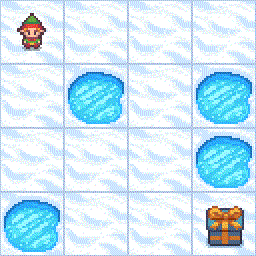


* **Observation Space:** The observation space of the environment is a grid representing the state of the lake.
* **Action Space:** The agent has four possible actions at each time step: move up, move down, move left, or move right.
* **Goal:** The goal of the agent is to reach the goal state while avoiding holes in the ice.
* **Reward:** Reach goal(G): +1 , Reach hole(H): 0 , Reach frozen(F): 0
* **Episode Termination:** The environment signals the end of an episode with a "done" signal.


In [5]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode='rgb_array')
spec = gym.spec('FrozenLake-v1')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Nondeterministic: False
Reward Range: (0, 1)
Reward Threshold: 0.7



In [6]:
Actions =  {0: 'LEFT', 
            1: 'DOWN',
            2: 'RIGHT',
            3: 'UP'}

RIGHT --> DOWN --> DOWN


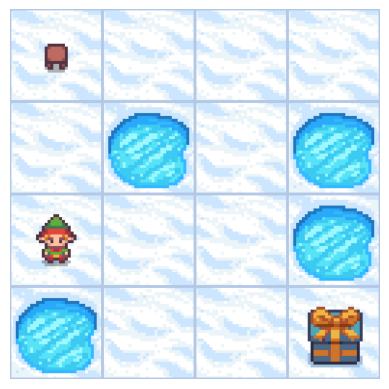

In [8]:
# Be free to test!
# take random actions, and see how the agent moves

env.reset()

action_seq= []

for i in range(3):
  action_number = env.action_space.sample()
  action_seq.append(Actions[action_number])
  env.step(action_number)

print(' --> '.join(action_seq))
env_screen = env.render()
plt.imshow(env_screen)
plt.axis('off');

## Q-Learning
Q-Learning is a model-free reinforcement learning algorithm that is used to find the optimal policy for an agent in an environment. It is based on the idea of updating an estimate of the optimal action-value function using the Bellman equation. The optimal action-value function is defined as the maximum expected reward that an agent can receive by taking an action a in a state s and following the optimal policy thereafter.

The action-value function Q(s,a) is updated iteratively as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

where ‍‍‍‍‍`r` is the reward received after taking action a in state `s`, `s'` is the new state, $\gamma$ is the discount factor (a value between 0 and 1 that determines the importance of future rewards), and $\alpha$ is the learning rate (determines the step size at which the value function is updated).

In [165]:
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    # Initialize the action-value function Q(s,a)
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    
    # Loop over each episode
    for episode in range(num_episodes):

        state = env.reset()[0]
        decay_rate = 0.005

        # ==================================== Your Code (Begin) ====================================
        while True:
            
            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample() #explore
            else:
                action = np.argmax(Q[state, :]) #exploit
            
            new_state, reward, done, _, _ = env.step(action)
            target = reward + gamma * np.max(Q[new_state,:])
            Q[state, action] = Q[state, action] + alpha * (target - Q[state, action])
            state = new_state
            
            if done:
                break
        
        #exponential decay of epsilon, since we need less exploration as we proceed more episodes
        epsilon = np.exp(-decay_rate*episode)
        # ==================================== Your Code (End) ====================================
            
    # Return the learned action-value function
    return Q

In [289]:
# change the parameters if needed
num_episodes = 1000
alpha = 0.8
gamma = 0.95
epsilon = 1

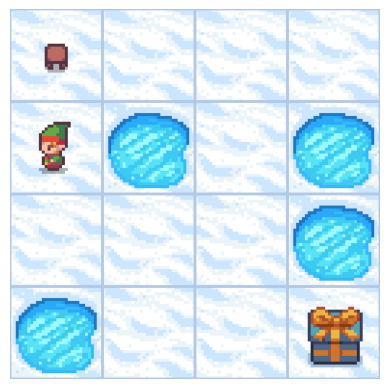

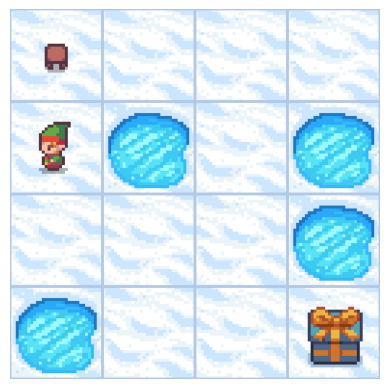

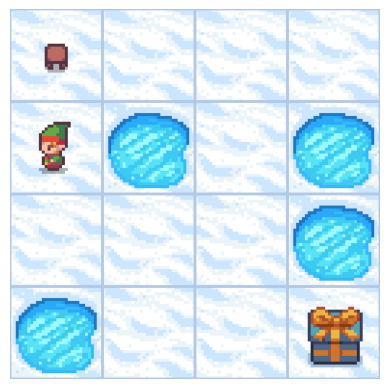

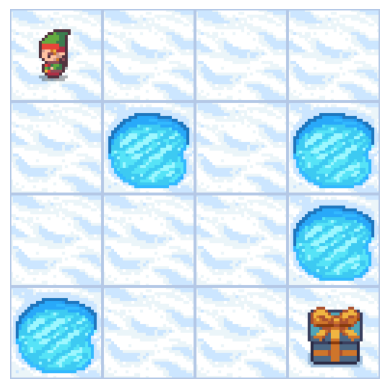

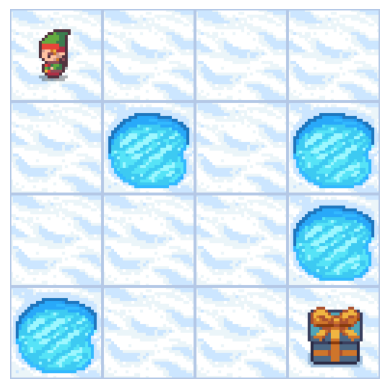

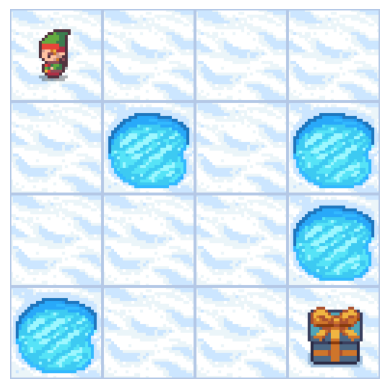

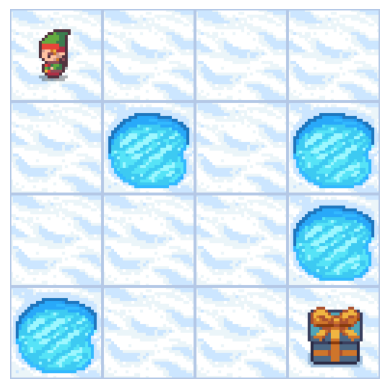

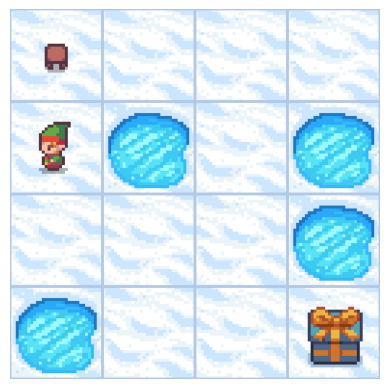

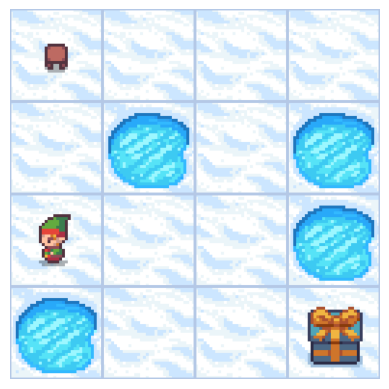

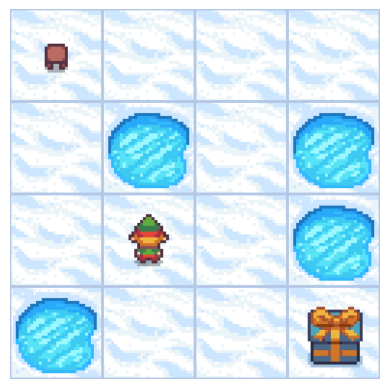

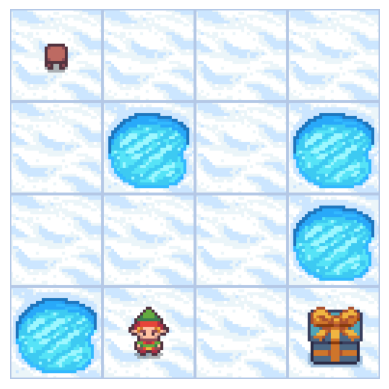

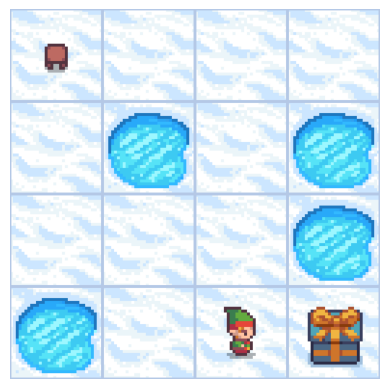

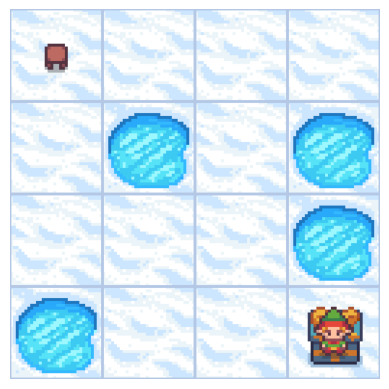

Successful episode!
LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> UP --> DOWN --> RIGHT --> DOWN


In [308]:
Q = q_learning(env, num_episodes, alpha, gamma, epsilon)

done = False
state = env.reset()[0]
action_seq = []


plt.figure()

while not done:

    action = np.argmax(Q[state, :])
    new_state, reward, done, _, _ = env.step(action)
    state = new_state
    
    action_seq.append(Actions[action])
    
    env_disp = env.render()
    plt.ion()
    plt.imshow(env_disp)
    plt.axis('off')
    plt.pause(0.1)
    
    if done:
        if reward == 1:
            print("Successful episode!")
            print(' --> '.join(action_seq))
        else:
            print("Failed episode!")

Success Rate: 0.84


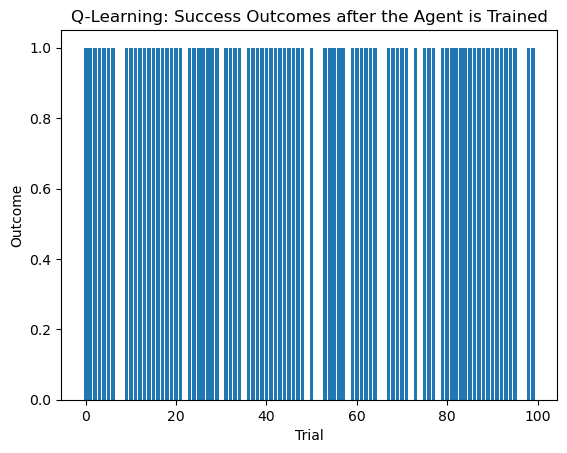

In [321]:
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.
success_Q = []
seq_len_Q = []

for i in range(100):
    done = False
    state = env.reset()[0]
    len_q = 0
    
    while not done:
        len_q += 1
        action = np.argmax(Q[state, :])
        new_state, reward, done, _, _ = env.step(action)
        state = new_state
    
        if done:
            seq_len_Q.append(len_q)
            if reward == 1:
                success_Q.append(True)
            else:
                success_Q.append(False)
                

print('Success Rate:', sum(success_Q)/100)

plt.bar(range(len(success_Q)), success_Q)
plt.title('Q-Learning: Success Outcomes after the Agent is Trained')
plt.xlabel('Trial')
plt.ylabel('Outcome');

## SARSA
SARSA (State-Action-Reward-State-Action) is a popular reinforcement learning algorithm used for finding an optimal policy in an environment. Like Q-learning, SARSA is an off-policy algorithm that updates the values of the Q-table based on the observed rewards and next state-action pairs.

The key difference between SARSA and Q-learning is in the selection of the next action. In SARSA, the next action is selected based on the current policy, whereas in Q-learning, the next action is selected based on the greedy policy. This means that in SARSA, the algorithm is learning about the expected returns from the current policy, whereas in Q-learning, the algorithm is learning about the optimal policy.

Mathematically, the SARSA update rule can be represented as:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$


Where $Q(S_t,A_t)$ is the current estimate of the expected return for taking action $A_t$ in state $S_t$, $\alpha$ is the learning rate, $R_{t+1}$ is the reward received after taking action $A_t$ in state $S_t$, $\gamma$ is the discount factor, and $Q(S_{t+1},A_{t+1})$ is the estimated return for taking action $A_{t+1}$ in the next state $S_{t+1}$.


In [322]:
def sarsa(env, num_episodes, alpha, gamma, epsilon):
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    for episode in range(num_episodes):
        state = env.reset()[0]
        decay_rate = 0.005
        
        # ==================================== Your Code (Begin) ====================================
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample() #explore
        else:
            action = np.argmax(Q[state, :]) #exploit

        while True:
            new_state, reward, done, _, _ = env.step(action)
            
            if np.random.uniform(0,1) < epsilon:
                new_action = env.action_space.sample() #explore
            else:
                new_action = np.argmax(Q[new_state, :]) #exploit

            target = reward + gamma * Q[new_state, new_action]
            Q[state, action] += alpha * (target - Q[state, action])
            state = new_state
            action = new_action

            if done:
                break
                
        #exponential decay of epsilon, since we need less exploration as we proceed more episodes
        epsilon = np.exp(-decay_rate*episode)
        # ==================================== Your Code (End) ====================================
        
    return Q

In [358]:
# change the parameters if needed
n_episodes = 1000
alpha = 0.8
gamma = 0.95
epsilon = 1

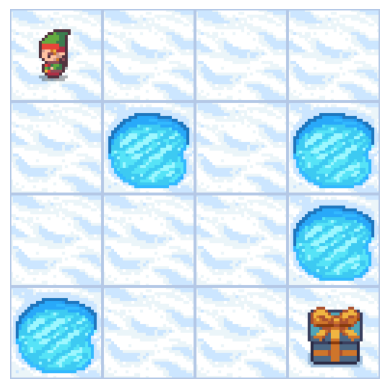

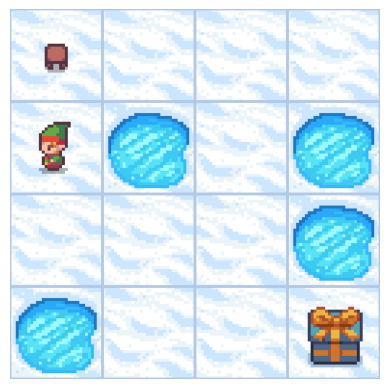

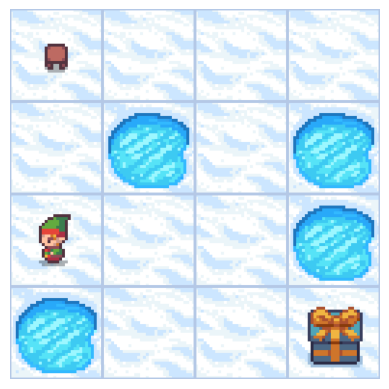

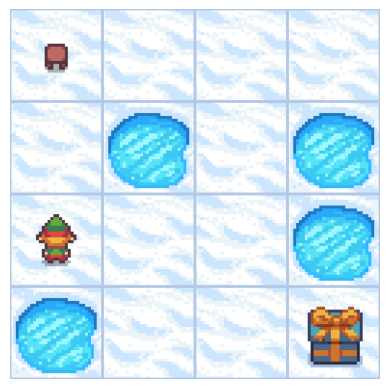

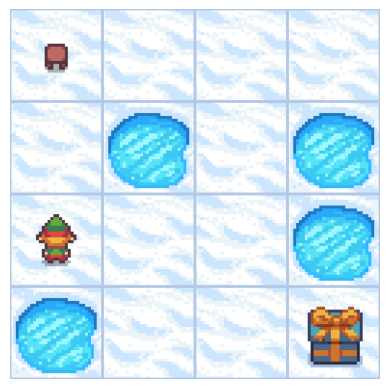

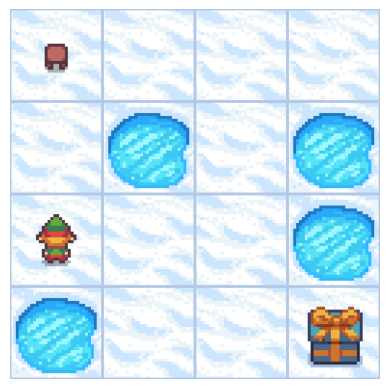

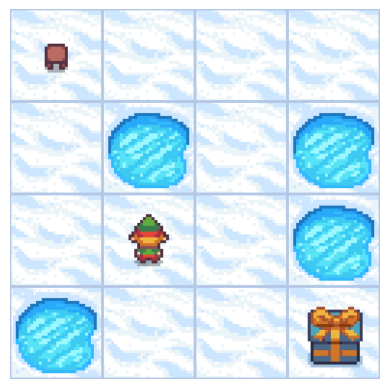

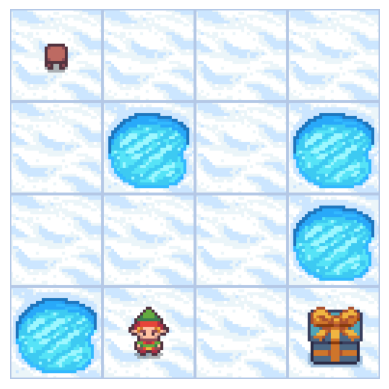

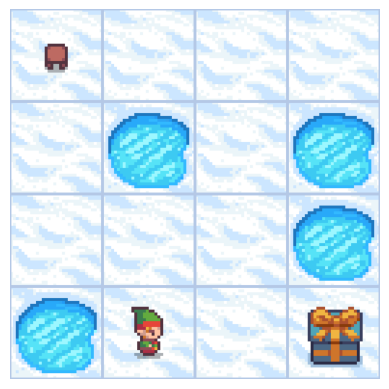

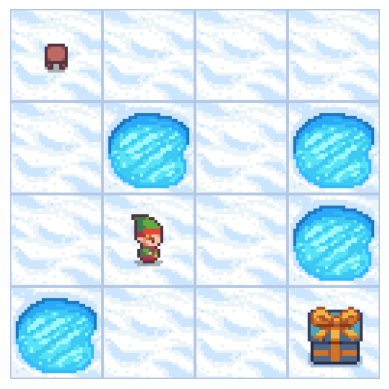

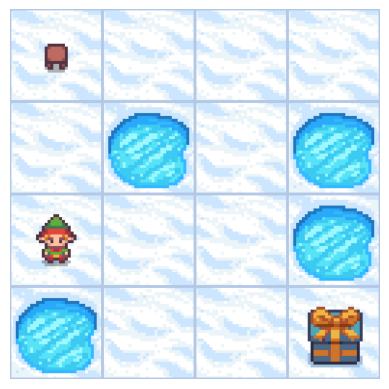

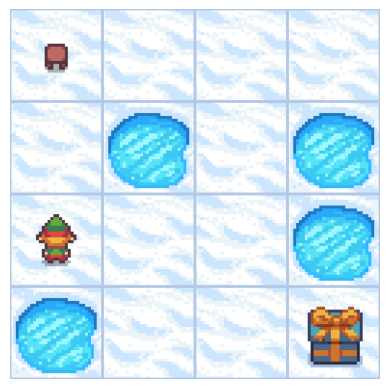

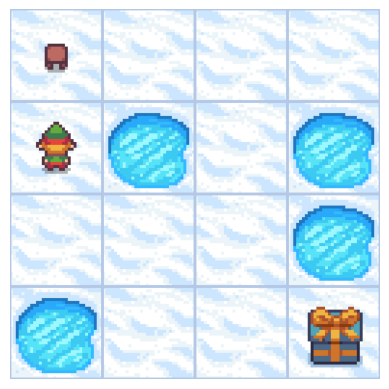

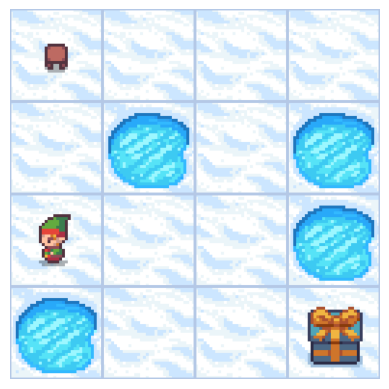

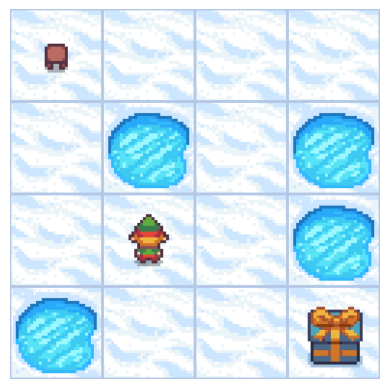

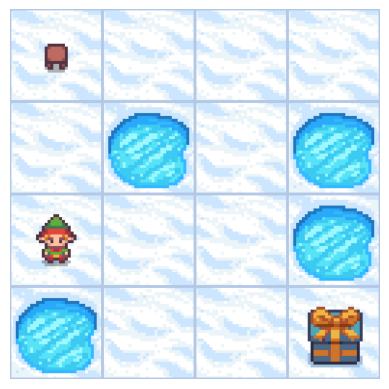

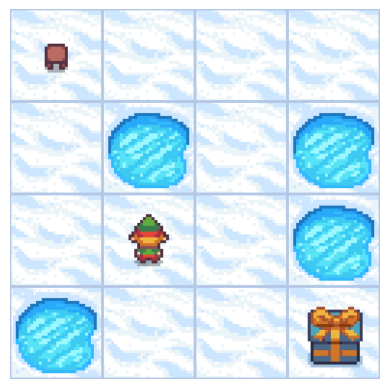

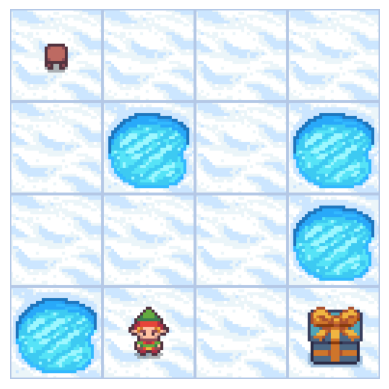

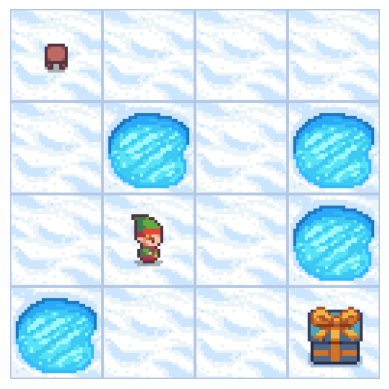

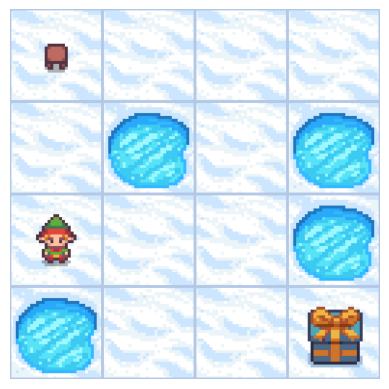

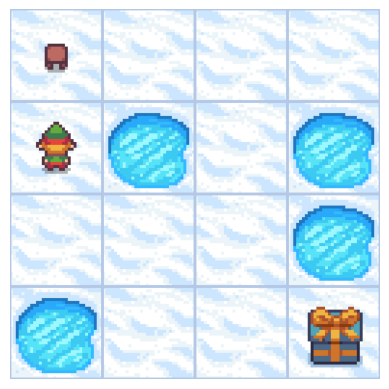

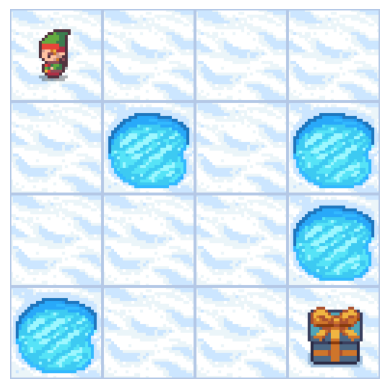

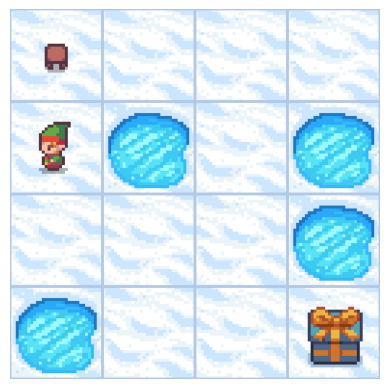

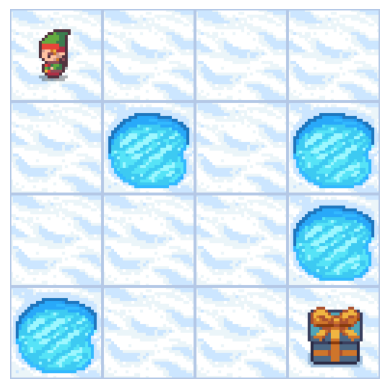

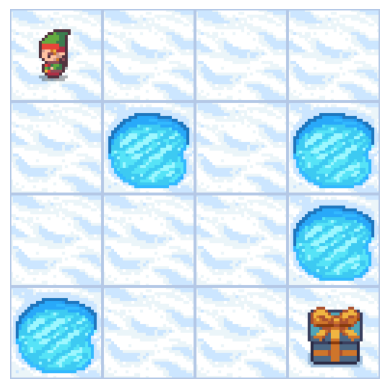

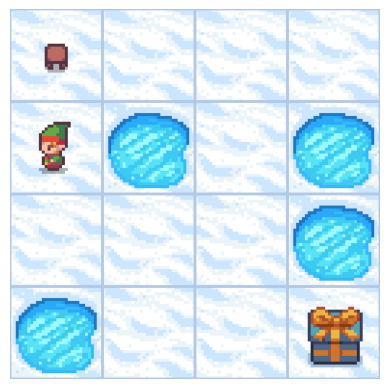

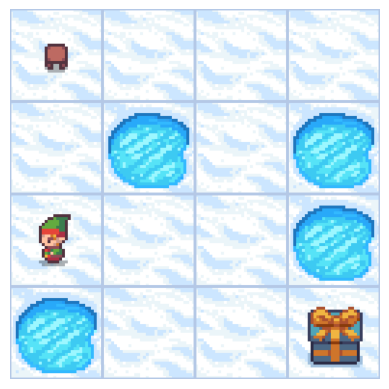

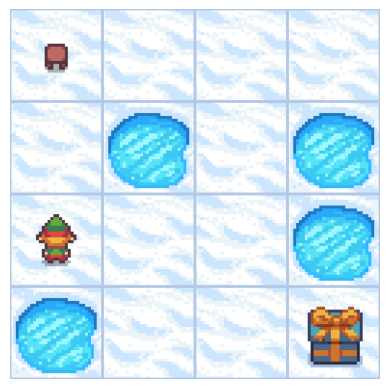

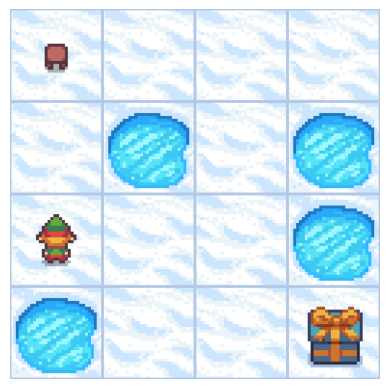

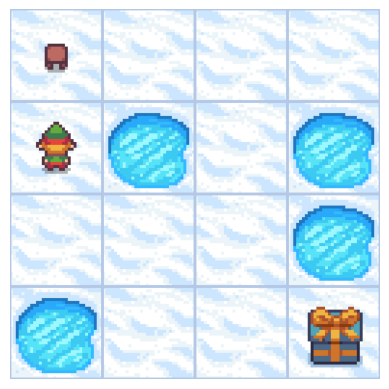

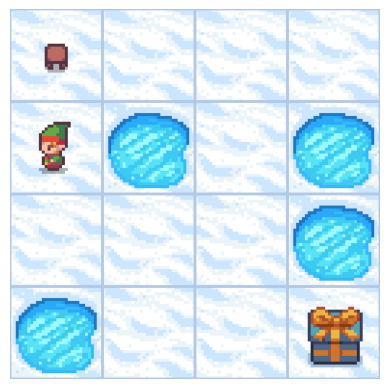

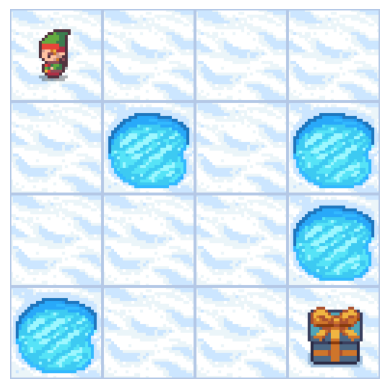

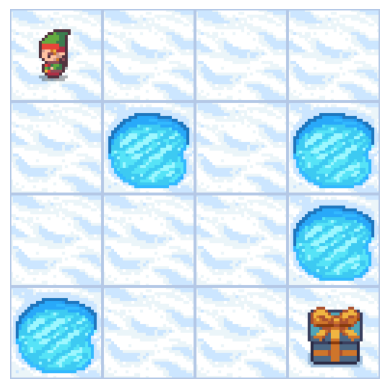

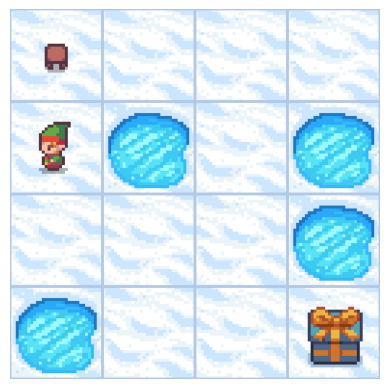

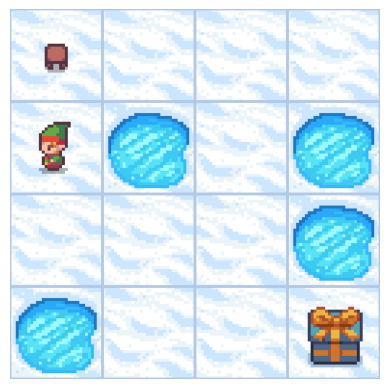

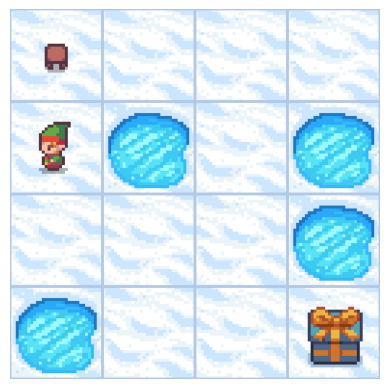

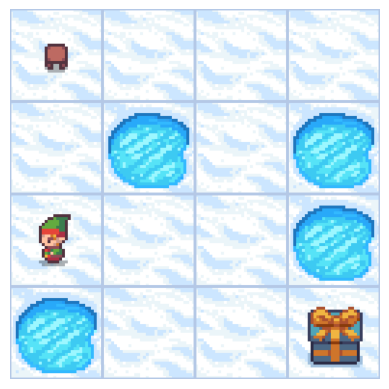

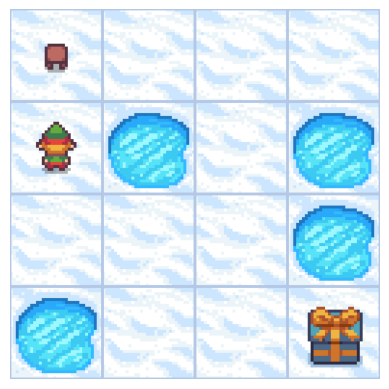

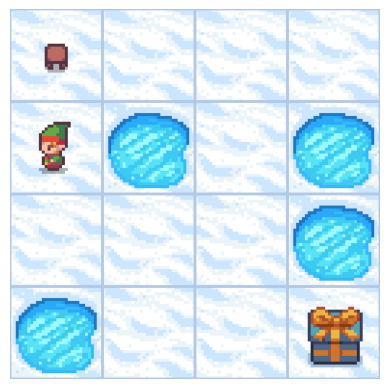

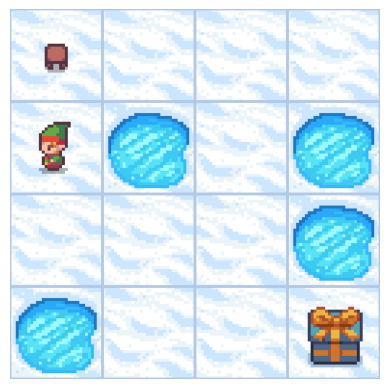

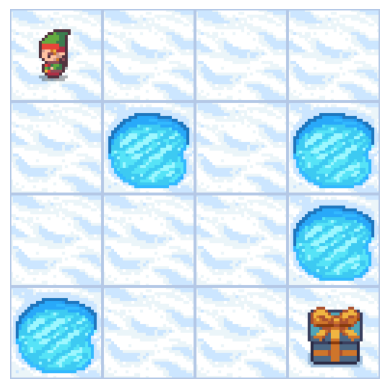

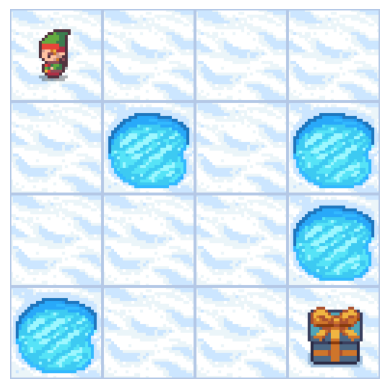

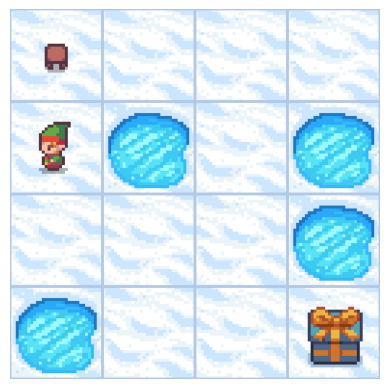

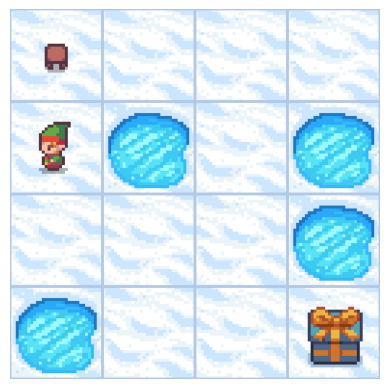

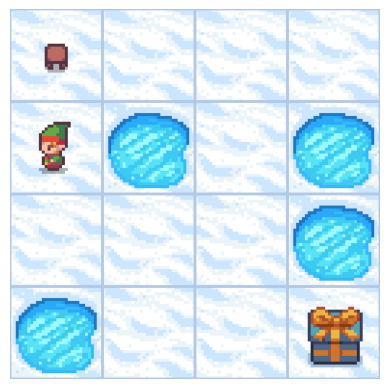

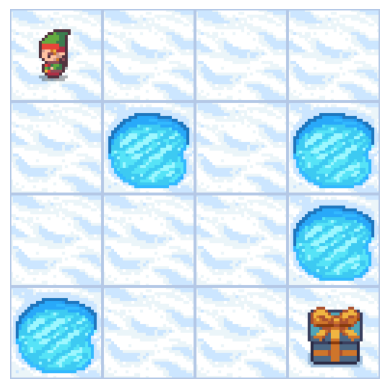

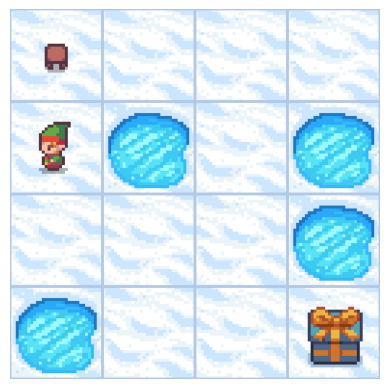

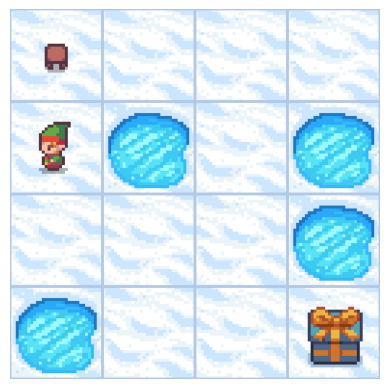

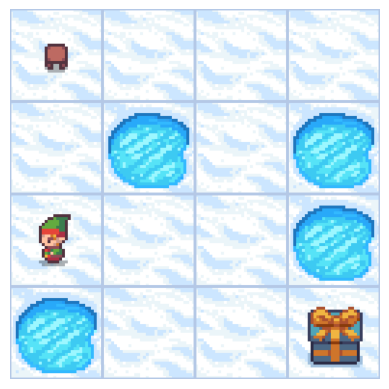

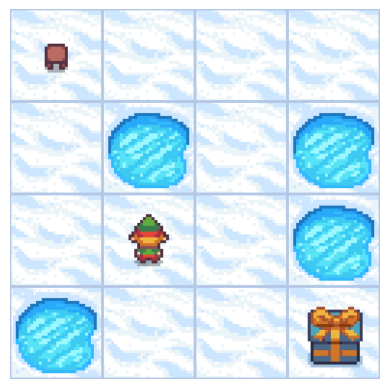

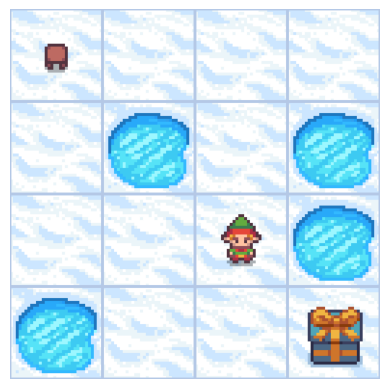

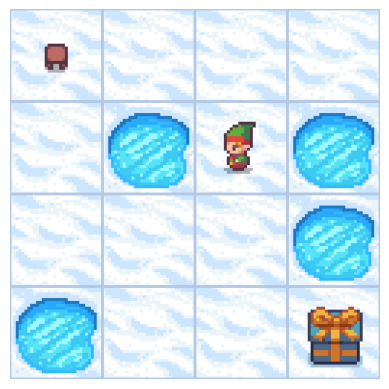

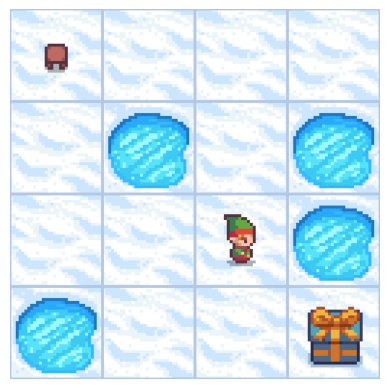

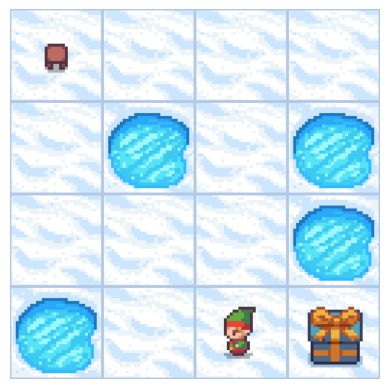

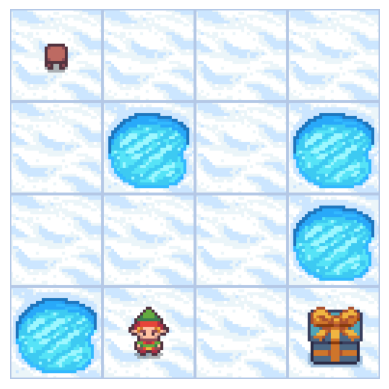

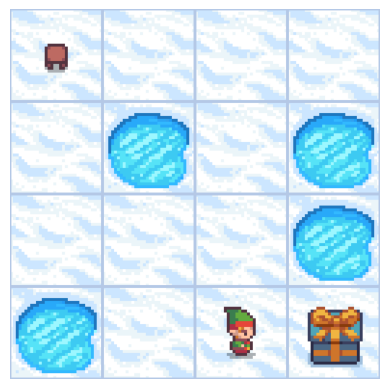

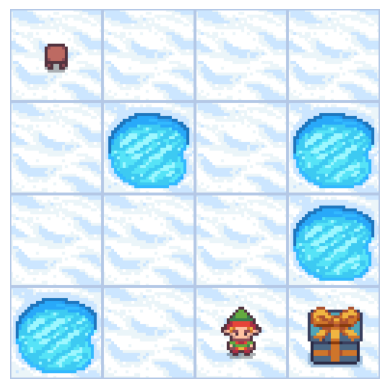

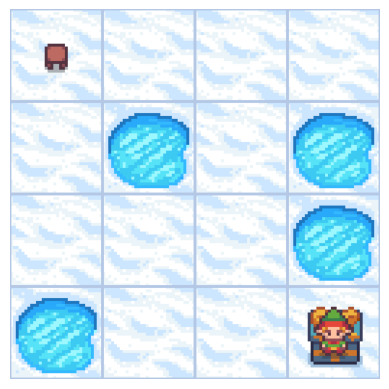

Successful episode!
LEFT --> LEFT --> LEFT --> UP --> UP --> UP --> UP --> DOWN --> RIGHT --> RIGHT --> DOWN --> UP --> UP --> LEFT --> UP --> DOWN --> UP --> DOWN --> RIGHT --> DOWN --> UP --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> UP --> UP --> UP --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> UP --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> LEFT --> UP --> DOWN --> LEFT --> RIGHT --> LEFT --> DOWN --> RIGHT --> DOWN --> DOWN


In [361]:
Q = sarsa(env, num_episodes, alpha, gamma, epsilon)

done = False
state = env.reset()[0]
action_seq = []


plt.figure()

while not done:

    action = np.argmax(Q[state, :])
    new_state, reward, done, _, _ = env.step(action)
    state = new_state
    
    action_seq.append(Actions[action])
    
    env_disp = env.render()
    plt.ion()
    plt.imshow(env_disp)
    plt.axis('off')
    plt.pause(0.1)
    
    if done:
        if reward == 1:
            print("Successful episode!")
            print(' --> '.join(action_seq))
        else:
            print("Failed episode!")

Success Rate: 0.78


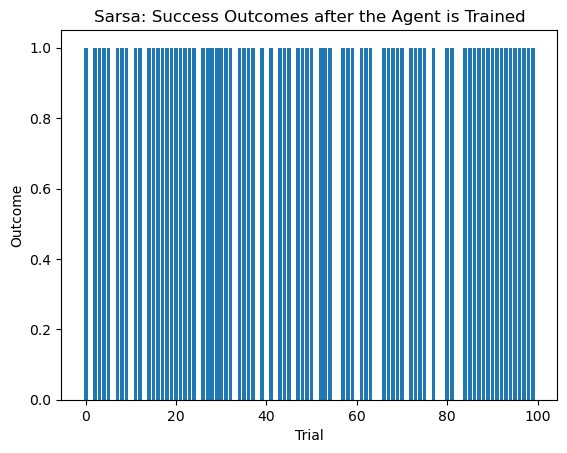

In [377]:
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.
success_Sarsa = []
seq_len_Sarsa = []

for i in range(100):
    done = False
    state = env.reset()[0]
    len_sarsa = 0
    
    while not done:
        len_sarsa += 1
        action = np.argmax(Q[state, :])
        new_state, reward, done, _, _ = env.step(action)
        state = new_state
    
        if done:
            seq_len_Sarsa.append(len_sarsa)
            if reward == 1:
                success_Sarsa.append(True)
            else:
                success_Sarsa.append(False)
                

print('Success Rate:', sum(success_Sarsa)/100)

plt.bar(range(len(success_Sarsa)), success_Sarsa)
plt.title('Sarsa: Success Outcomes after the Agent is Trained')
plt.xlabel('Trial')
plt.ylabel('Outcome');

## Conclution
Compare these 2 methods based on average return, penalty, episode length and success rate.
In the previous cells, if necessary, store the necessary variables for this comparison and use them in the following block.

### Answer:
As we saw in the above figures, the success rate of Q-learning was a little bit higher than Sarsa, although it is variable and we can conclude these algorithms do not differ in the success rate. Also, since all the returns are zero (even for failure states) and only one for the bottom-right state, the average return would simply be the success rate and the avergae penalty would just be the failure rate.

Another point to mention is the average episode length, which seems to be a bit higher for Sarsa.

Just to note, I got better success rate when I used an exponential decay on the threshold $\epsilon$ and this technique increased this objective for me, while increased the episode length as well.

In [391]:
print('Average Episode Length:\nQ-Learning:', np.mean(seq_len_Q), '\tSarsa:', np.mean(seq_len_Sarsa))
print('\nSuccess Rate = Average Return:\nQ-Learning:', np.mean(success), '\tSarsa:', np.mean(success_Sarsa))
print('\nAverage Penalty = Failure Rate:\nQ-Learning:', np.round(1 - np.mean(success), 2), '\tSarsa:', np.round(1 - np.mean(success_Sarsa), 2))

Average Episode Length:
Q-Learning: 42.76 	Sarsa: 48.49

Success Rate = Average Return:
Q-Learning: 0.84 	Sarsa: 0.78

Average Penalty = Failure Rate:
Q-Learning: 0.16 	Sarsa: 0.22


# 2. Monte Carlo method

In this notebook, you will learn about the Monte Carlo method in the context of reinforcement learning.
Your agent will move in the following picture. This is a random walk with two possible actions (`LEFT` and `RIGHT`).
The agent gets a reward of 1 if it reaches the right-most state, and 0 otherwise. You are going to use such an environment with 31 states.

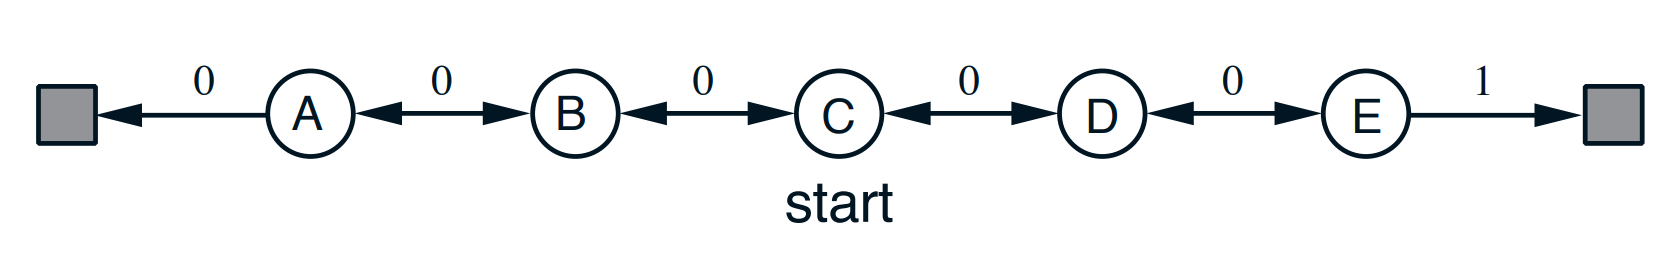

In [420]:
class RandomWalkEnv():
    def __init__(self, num_states=31, start=15, gamma=1):
        self.num_states = num_states
        self.start = start
        self.end = num_states - 1
        self.gamma = gamma
        self.state = None
        self.actions = ['LEFT', 'RIGHT']

    def reset(self):
        self.state = self.start
        return self.state, 0, False

    def step(self, action):
        if self.state == self.end or self.state == 0:
            return self.state, 0, True
        action_direction = 0
        if action == 'RIGHT':
            action_direction = 1
        elif action == 'LEFT':
            action_direction = -1

        self.state += action_direction
        reward, done = 0, False
        if self.state == self.end:
            reward, done = 1, True
        elif self.state == 0:
            done = True
        return self.state, reward, done

    def get_true_values(self):
        values = [0] * self.num_states
  
        values[self.end - 1] = 1
        for i in range(self.end - 1, 1, -1):
            values[i - 1] = self.gamma * values[i]
        
        return values

The Monte Carlo method is a reinforcement learning technique for estimating the value function of a Markov decision process (MDP). It involves generating multiple episodes by following a given policy and computing the returns (sum of rewards) for each state-action pair. The value of a state-action pair is then estimated as the average of the returns obtained from that pair over multiple episodes.

The formula for updating the value function using the Monte Carlo method is:

\begin{equation}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \frac{1}{N(S_t,A_t)} \sum_{i=1}^{N(S_t,A_t)}(G_i - Q(S_t,A_t))
\end{equation}

where $Q(S_t,A_t)$ is the estimated value of the state-action pair $(S_t,A_t)$, $N(S_t,A_t)$ is the number of times the state-action pair has been visited, $G_i$ is the return obtained from the $i$th visit to the state-action pair, and the sum is taken over all $N(S_t,A_t)$ visits.

To implement the Monte Carlo method, you need to define the environment, the policy, and the number of episodes to simulate. At each step of the episode, you observe the state, take an action according to the policy, and observe the reward and the next state. You then update the value function using the formula above. As more episodes are generated, the value estimates become more accurate.

In [456]:
def MC(env, num_episodes, alpha=0.1):
    
    # ==================================== Your Code (Begin) ====================================
    Q = np.zeros((env.num_states, len(env.actions)))
    N = np.zeros((env.num_states, len(env.actions)))
    epsilon = 1
    k = 1
    errors = []
    
    for episode in range(num_episodes):
        
        states = []
        actions = []
        target = []
        
        state = env.reset()[0]
        action = env.actions[np.random.randint(0,2)]
        states.append(state)
        actions.append(action)
        i = 0
        
        
        while True:
            new_state, reward, done = env.step(action)
            
            target.append(gamma ** i * reward)

            new_action = env.actions[np.random.randint(0,2)]
            states.append(new_state)
            actions.append(new_action)
        
            state = new_state
            action = new_action
            i += 1
                       
            if done:
                break
                
        T = len(states)
        for t in range(T):
            if actions[t] == 'RIGHT':
                a = 1
            else:
                a = 0
                
            N[states[t], a] += 1
            Q[states[t], a] += 1/N[states[t], a] * (sum(target[t:])) - Q[states[t], a]
        
        k += 1
        epsilon = 1/k
        
        values = np.max(Q, axis = 1)
        
        from sklearn.metrics import mean_squared_error as mse
        error = np.sqrt(mse(values , env.get_true_values()))
        errors.append(error)
    # ==================================== Your Code (End) ====================================
    
    return values, errors

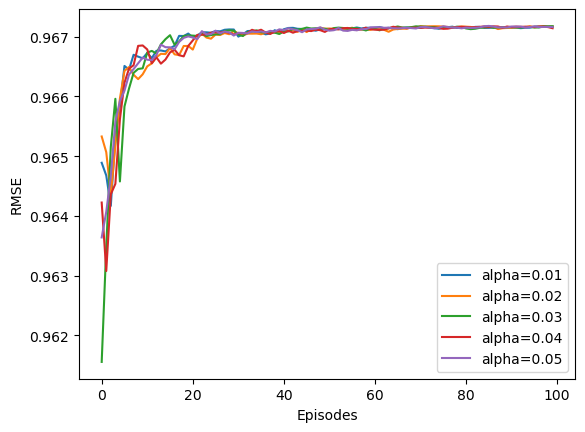

In [457]:
# Visualization

import matplotlib.pyplot as plt

env = RandomWalkEnv()
num_episodes = 100
alphas = [0.01, 0.02, 0.03, 0.04, 0.05]
num_runs = 100

for alpha in alphas:
    rmse_avg = np.zeros(num_episodes)
    for run in range(num_runs):
        values, errors = MC(env, num_episodes, alpha)
        rmse_avg += np.array(errors)
    rmse_avg /= num_runs
    plt.plot(range(num_episodes), rmse_avg, label=f'alpha={alpha}')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('RMSE')
plt.show()

# Any visualization for better intuition would be appreciated.